<a href="https://colab.research.google.com/github/Ajmyquira/tweets-topic-modelling/blob/master/5-insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting insights

### Working with the hashtags

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

hashtags = pd.read_json("/content/drive/MyDrive/UCSP/Data-Science-Topics/Data/hashtag_processed.json", orient="split")
hashtags

,date,text_processed
0,2021-07-28,peru mexico
1,2021-07-28,bicentenarioperu pedrocastillo piura gabineteb...
2,2021-07-28,castillodesahuevate
3,2021-07-28,asumetuvoto
4,2021-07-28,peru
...,...,...
222328,2022-04-30,istandwithcroacia
222329,2022-04-30,castillorenunciaya fueracastillo castillorenun...
222330,2022-04-30,asambleaconstituyentenova
222331,2022-04-30,terruca asesino terrorita terrucos


In [ ]:
# Separating the dates and the text from the dataframe
h_texts = []
h_dates = []

for i in range(len(hashtags)):
  h_texts.append(hashtags['text_processed'][i])
  h_dates.append(hashtags['date'][i])

print(len(h_texts))
print(len(h_dates))

222333
222333


Hashtag chart over time

In [ ]:
# This funtion return a the number of tweets that have a term based on the hashtag
def find_hashtags_by_time(term, dates, normalize=False):
  found_docs = []

  # Hashtag part
  for doc_idx in range(len(h_texts)):
    if term in h_texts[doc_idx]:
      found_docs.append(doc_idx)

  # Date part
  found_idx_dates = [(idx, dates[idx]) for idx in found_docs] # Tuple with the tweet and their correspond date
  df = pd.DataFrame(found_idx_dates)
  df = df.rename(columns={ 0 : "idx", 1 : "date"})
  df['datetime'] = pd.to_datetime(df['date'])
  df = df.set_index('datetime')
  df["h_"+term] = 1  # Create a new column called as the term with all the rows with ones
  df = df.drop(columns={'idx', 'date'})
  df = df.resample('D').sum()

  # Normalization
  if normalize == True:
    df_dates = pd.DataFrame(dates)
    df_dates = df_dates.rename(columns={0: 'date'})
    df_dates['datetime'] = pd.to_datetime(df_dates['date'])
    df_dates = df_dates.set_index('datetime')
    df_dates = df_dates.drop(columns={ 'date'})
    df_dates['documents'] = 1
    df_dates = df_dates.resample('D').sum()
    df_joined = df.merge(df_dates, left_index=True, right_index=True)
    df_joined[term+'_normalized'] = df_joined[term] / df_joined['documents']
    return df_joined

  return df

In [ ]:
test1 = find_hashtags_by_time("vacancia", h_dates)
test1

,h_vacancia
datetime,
2021-07-28,62
2021-07-29,62
2021-07-30,62
2021-07-31,52
2021-08-01,363
...,...
2022-04-26,23
2022-04-27,64
2022-04-28,23


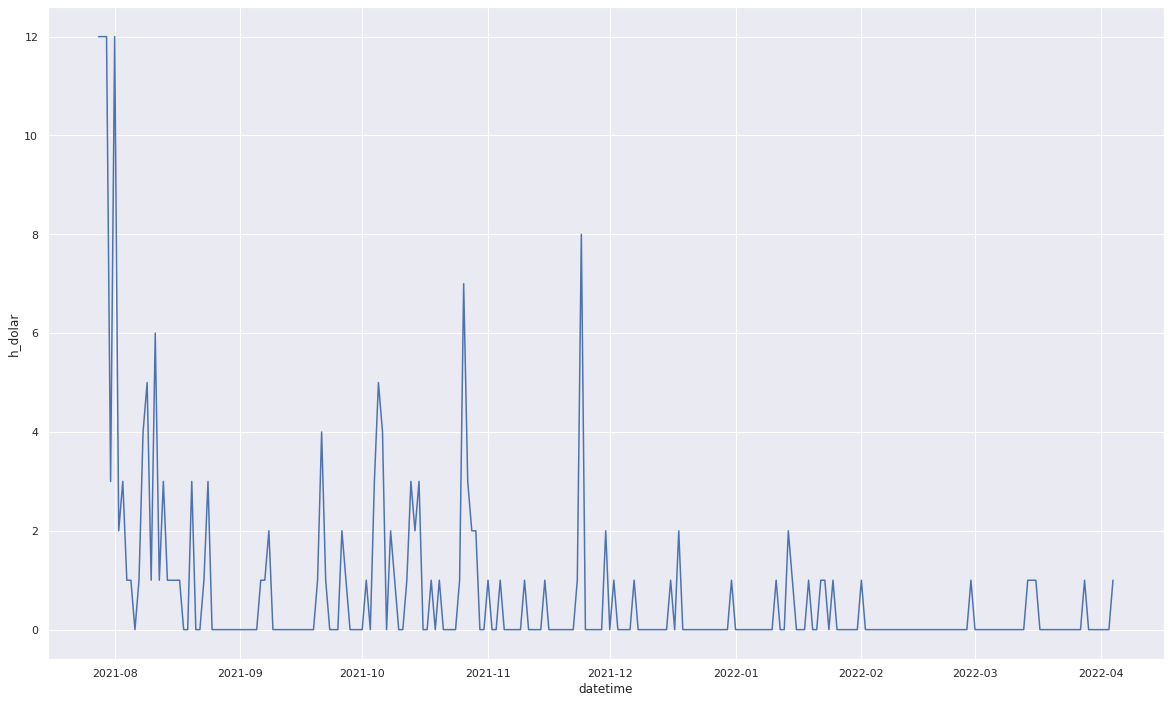

In [ ]:
import seaborn as sns

# Visualization from the hashtags over a time
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=test1['h_dolar'])

### Working with the topics

In [ ]:
!pip install -q top2vec[sentence_encoders]

     |████████████████████████████████| 5.2 MB 11.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 4.6 MB 45.1 MB/s 
     |████████████████████████████████| 1.1 MB 59.1 MB/s 
     |████████████████████████████████| 511.7 MB 5.6 kB/s 
     |████████████████████████████████| 511.7 MB 4.7 kB/s 
     |████████████████████████████████| 4.9 MB 38.4 MB/s 


In [ ]:
from top2vec import Top2Vec

models = []

# Loading the top2vec models
for i in range(9):
  model = Top2Vec.load("/content/drive/MyDrive/UCSP/Data-Science-Topics/Final-project/Top2Vec-models/model-0" + str(i+1))
  models.append(model)

In [ ]:
import pandas as pd

# Loading all the tweets text processed
tweets = pd.read_json("/content/drive/MyDrive/UCSP/Data-Science-Topics/Data/tweets_text_processed.json", orient="split")
tweets

,date,text_processed
0,2021-07-28,hablas diosdado cabello chavez maduro castros
1,2021-07-28,gente necios evidencias siguen creyendo cuento...
2,2021-07-28,u exico desafia peru nombramiento gabinete rad...
3,2021-07-28,mentiste representa opuesto discurso abiertame...
4,2021-07-28,alguien gusto escuchar habra trenes discurso
...,...,...
2166124,2022-04-30,gobierno incapaz corrupto ademas indolente pueblo
2166125,2022-04-30,seria encabece marcha
2166126,2022-04-30,jsjsjsjs
2166127,2022-04-30,now playing aosto by


In [ ]:
# Set the month of each tweet
tweets["month"] = tweets.date.dt.month
tweets

,date,text_processed,month
0,2021-07-28,hablas diosdado cabello chavez maduro castros,7
1,2021-07-28,gente necios evidencias siguen creyendo cuento...,7
2,2021-07-28,u exico desafia peru nombramiento gabinete rad...,7
3,2021-07-28,mentiste representa opuesto discurso abiertame...,7
4,2021-07-28,alguien gusto escuchar habra trenes discurso,7
...,...,...,...
2166124,2022-04-30,gobierno incapaz corrupto ademas indolente pueblo,4
2166125,2022-04-30,seria encabece marcha,4
2166126,2022-04-30,jsjsjsjs,4
2166127,2022-04-30,now playing aosto by,4


In [ ]:
tweets_list = []

# Grouping the tweets by month
for i, _tweets in tweets.groupby('month'):
  tweets_list.append(pd.DataFrame(_tweets[['date', 'text_processed']]))

Consider this:
- 0: enero
- 1: febrero
- 2: marzo
- 3: abril
- 4: julio
- 5: agosto
- 6: septiembre
- 7: octubre
- 8: noviembre
- 9: diciembre

In this part, the dates_list store the dates of all the tweets, in cronologycal order.

In [ ]:
dates_list = []

For July and August together.

In [ ]:
temp = pd.concat([tweets_list[4],tweets_list[5]])

t_dates = []

for i in range(len(temp)):
  t_dates.append(temp['date'][i])

print(len(t_dates))
dates_list.append(t_dates)

302697


For September, October, November, December

In [ ]:
for i in range(4):
  temp = tweets_list[i + 6].reset_index(drop=True)

  t_dates = []

  for i in range(len(temp)):
    t_dates.append(temp['date'][i])

  print(len(t_dates))

  dates_list.append(t_dates)

184019
185829
253899
209261


For January, February, March, April

In [ ]:
for i in range(4):
  temp = tweets_list[i].reset_index(drop=True)

  t_dates = []

  for i in range(len(temp)):
    t_dates.append(temp['date'][i])

  print(len(t_dates))

  dates_list.append(t_dates)

225833
307867
236466
260258


In [ ]:
import numpy as np
import pandas as pd

# This function get all topics data by the documents for all models
def find_topic_count_time(doc_topics ,term, dates, prob_criteria=0.65, normalize=False):
  found_topic_docs = []

  # Topics part
  for doc_idx in range(len(dates)):
    if term in doc_topics[2][doc_idx]:
      arr_index = np.where(doc_topics[2][doc_idx] == term)  # Location of the term in the array
      if doc_topics[3][doc_idx][arr_index][0] > prob_criteria:
        found_topic_docs.append(doc_idx)

  # Date part
  found_idx_dates = [(idx, dates[idx]) for idx in found_topic_docs] # Tuple with the tweet and their correspond date
  df = pd.DataFrame(found_idx_dates)
  df = df.rename(columns={ 0 : "idx", 1 : "date"})
  df['datetime'] = pd.to_datetime(df['date'])
  df = df.set_index('datetime')
  df['t_'+term] = 1  # Create a new column called as the term with all the rows with ones
  df = df.drop(columns={'idx', 'date'})
  df = df.resample('D').sum()

  if normalize == True:
    df_dates = pd.DataFrame(dates)
    df_dates = df_dates.rename(columns={0: 'date'})
    df_dates['datetime'] = pd.to_datetime(df_dates['date'])
    df_dates = df_dates.set_index('datetime')
    df_dates = df_dates.drop(columns={ 'date'})
    df_dates['documents'] = 1
    df_dates = df_dates.resample('D').sum()
    df_joined = df.merge(df_dates, left_index=True, right_index=True)
    df_joined[term+'_normalized'] = df_joined[term] / df_joined['documents']
    return df_joined

  return df

In [ ]:
# This function return the final dataframe with the all amount of tweets with a term a topic over a time
def join_df(term):
  doc_topics = models[0].get_documents_topics([i for i in range(len(dates_list[0]))])
  df = find_topic_count_time(doc_topics, term, dates_list[0])

  for i in range(1, 9):
    doc_topics = models[i].get_documents_topics([i for i in range(len(dates_list[i]))])
    n_df = find_topic_count_time(doc_topics, term, dates_list[i])
    df = pd.concat([df,n_df])

  return df

In [ ]:
test2 = join_df("vacancia")
test2

,t_vacancia
datetime,
2021-07-28,64
2021-07-29,64
2021-07-30,64
2021-07-31,48
2021-08-01,83
...,...
2022-04-26,2
2022-04-27,30
2022-04-28,4


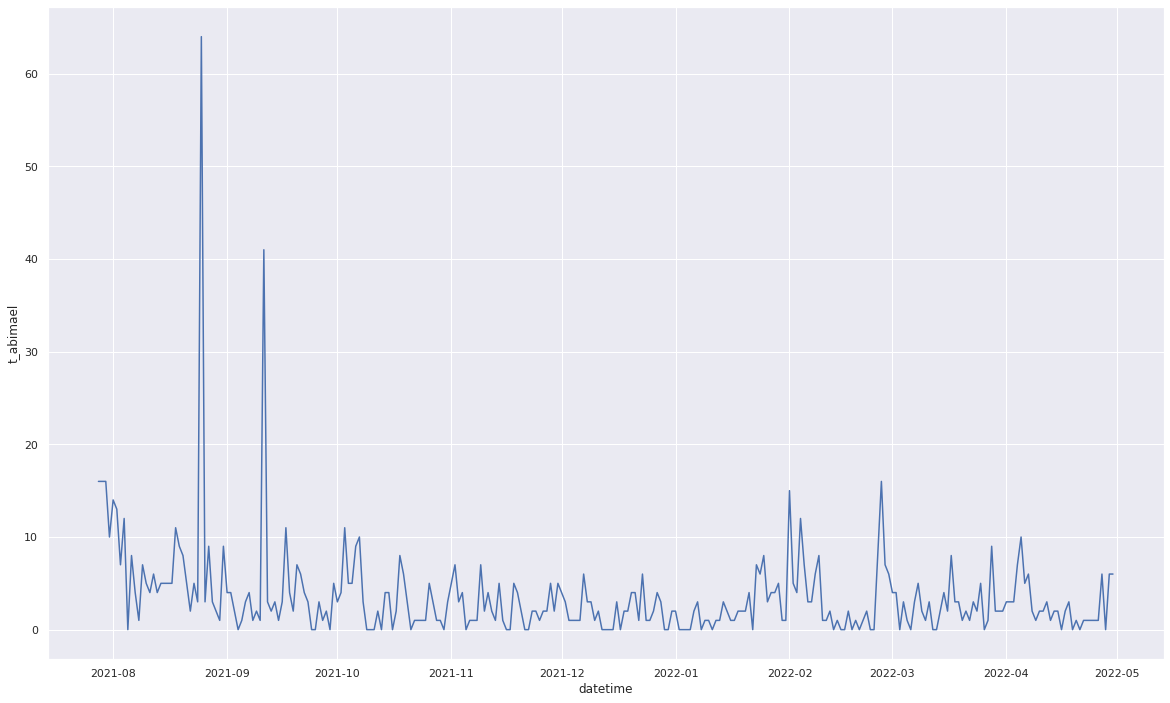

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=test2['t_abimael'])

### Final insight

For this final insight, both studies, using hashtags and topics are combined and compared, showing the relevances of the hashtags compared to topic modelling.

In [ ]:
# Combined both results
final = pd.concat([test1, test2], axis=1)
final

,h_vacancia,t_vacancia
datetime,,
2021-07-28,62,64
2021-07-29,62,64
2021-07-30,62,64
2021-07-31,52,48
2021-08-01,363,83
...,...,...
2022-04-26,23,2
2022-04-27,64,30
2022-04-28,23,4


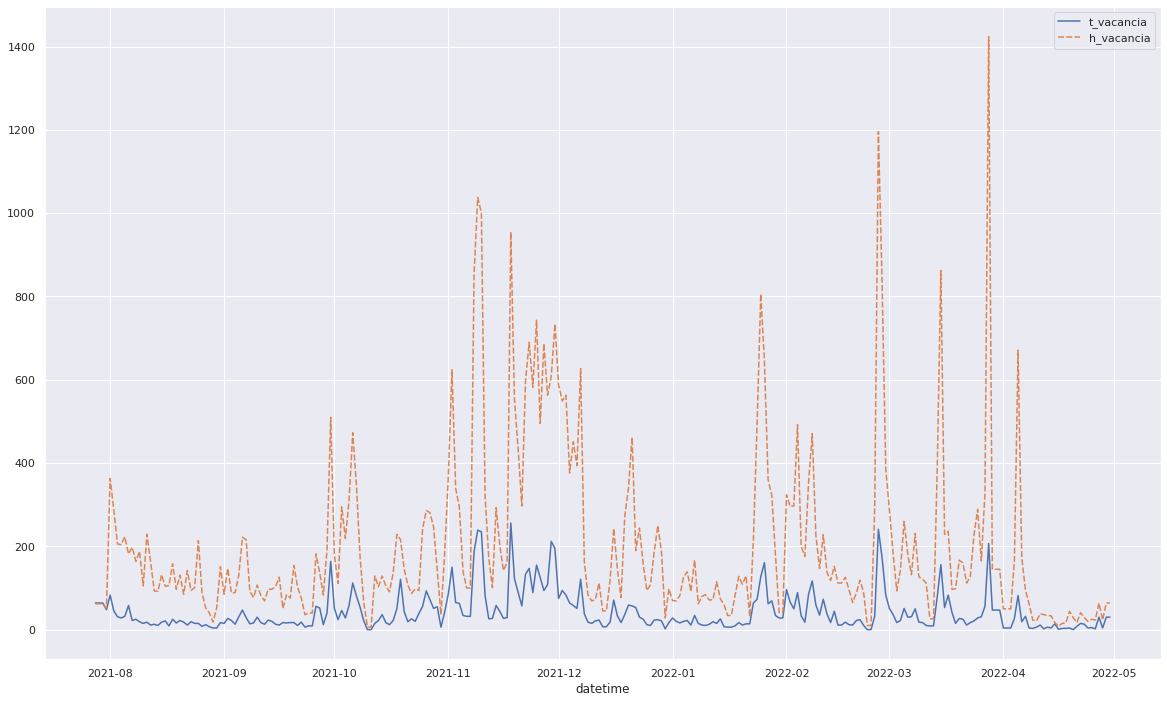

In [ ]:
import seaborn as sns

# Visualization
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=final[['t_vacancia','h_vacancia']])